In [50]:
%matplotlib inline

import pandas as pd
import numpy as np
import time
from surprise.model_selection import cross_validate
from sklearn.externals import joblib
import Recommenders as Recommenders
from scipy.sparse import csr_matrix
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [51]:
df=pd.read_csv("ratings_Electronics.csv",nrows=100000)

In [52]:
df.shape

(100000, 4)

In [53]:
df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [54]:
df.columns = ['userId','productId','ratings','Timestamp']

In [55]:
df.dropna(inplace=True)
df.head()

,userId,productId,ratings,Timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002096D86F748>,
      dtype=object)

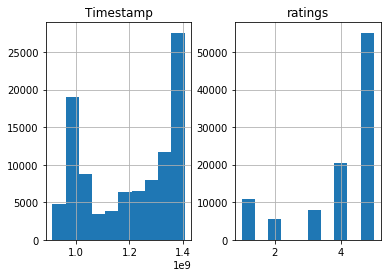

In [56]:
df.hist()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
userId       100000 non-null object
productId    100000 non-null object
ratings      100000 non-null float64
Timestamp    100000 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


In [58]:

df=df.loc[df['ratings'] >= 5.0]
df.shape

(55116, 4)

In [59]:
X_train, X_test = train_test_split(df, test_size=0.3)

In [60]:
users = df['userId'].unique()

In [61]:
pm = Recommenders.popularity_recommender_py()
pm.create(X_train, 'userId', 'productId')

In [62]:
user_id = users[20]
actual=pm.recommend(user_id)
actual.head(2)

,userId,productId,score,Rank
3469,A24RBL3W5W6SAN,B00004ZCJE,1014,1.0
1327,A24RBL3W5W6SAN,B00001P4ZH,970,2.0


In [63]:
pm = Recommenders.popularity_recommender_py()
pm.create(X_test, 'userId', 'productId')

In [64]:
predicted=pm.recommend(user_id)
predicted.head(2)

,userId,productId,score,Rank
2321,A24RBL3W5W6SAN,B00004ZCJE,495,1.0
818,A24RBL3W5W6SAN,B00001P4ZH,409,2.0


In [65]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(actual[['score']], predicted[['score']]))


In [67]:
rmse

367.2711532369511

In [68]:
R_df = df.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
R_df.tail()

productId,0321732944,0511189877,0528881469,059400232X,0594012015,0594033896,0594033926,0594033934,0594287995,0594296420,...,B00005K2Q3,B00005K2QY,B00005K2R0,B00005K2R1,B00005K2S8,B00005K2SA,B00005K3AN,B00005K3KD,B00005K3LZ,B00005K47X
userId,,,,,,,,,,,,,,,,,,,,,
AZZR8DUVE5L8O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZREGNDJCXP8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZST8OYL5P4Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZUBI2MEAHI9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZZEWADNFNUM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_df, k = 50)

In [70]:
sigma = np.diag(sigma)

In [71]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)

In [72]:
preds_df.head()

productId,0321732944,0511189877,0528881469,059400232X,0594012015,0594033896,0594033926,0594033934,0594287995,0594296420,...,B00005K2Q3,B00005K2QY,B00005K2R0,B00005K2R1,B00005K2S8,B00005K2SA,B00005K3AN,B00005K3KD,B00005K3LZ,B00005K47X
0,-2.049173e-33,-5.424858e-34,-2.824751e-33,-2.395409e-34,-3.015740e-34,-1.236119e-34,1.237269e-19,-8.887691e-35,-1.740175e-33,2.228378e-23,...,-1.069402e-33,3.150496e-35,-4.769873e-33,2.480566e-33,2.051638e-33,-5.385071e-36,-7.243668e-22,-2.455248e-34,-4.195283e-35,-2.681209e-18
1,-1.209839e-33,-1.817985e-33,-1.049987e-33,-7.729379e-34,-3.452068e-33,-1.341774e-33,-2.146465e-20,-1.087224e-33,-1.071672e-33,1.603446e-23,...,-6.281073e-34,3.254474e-34,-6.100901e-33,1.506222e-33,1.256653e-33,-5.395540e-35,-1.328577e-20,-7.680092e-34,-3.440062e-34,3.693776e-17
2,4.217138e-18,-1.146575e-17,7.916463e-18,8.827936e-18,1.237022e-17,4.772419e-18,3.532371e-08,4.479293e-18,3.906400e-18,3.547372e-11,...,2.402790e-18,-1.160969e-18,8.372761e-17,-2.656975e-18,-4.585327e-18,1.888492e-19,4.450032e-08,8.742614e-18,1.255278e-18,1.205313e-06
3,-5.335838e-20,1.694114e-19,-5.456267e-20,-7.874202e-20,-4.064193e-20,-1.905973e-20,-1.462769e-09,-1.614341e-20,-5.486180e-20,7.156708e-13,...,-3.101522e-20,4.400579e-21,-6.468062e-20,8.257189e-20,6.687162e-20,-7.486029e-22,2.442925e-09,-8.081857e-20,-5.198203e-21,1.112893e-07
4,6.409947e-17,5.013353e-17,4.586001e-17,-1.321015e-18,1.790502e-17,6.997062e-18,-3.281501e-05,5.756186e-18,5.407559e-17,-1.825439e-09,...,3.245288e-17,-1.767603e-18,7.634326e-17,-7.533301e-17,-6.398533e-17,2.851557e-19,2.863421e-08,-1.001960e-18,1.776028e-18,9.577478e-07


In [73]:
sigma

array([[ 64.73340333,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  65.02644748,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  65.76448288, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 173.71198295,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        185.68872755,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 194.43247371]])

In [74]:
preds_df =preds_df.transpose() 
preds_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50817,50818,50819,50820,50821,50822,50823,50824,50825,50826
productId,,,,,,,,,,,,,,,,,,,,,
0321732944,-2.049173e-33,-1.209839e-33,4.217138e-18,-5.335838e-20,6.409947e-17,3.085653e-34,-1.733194e-33,1.202525e-19,-1.412424e-19,1.848432e-22,...,-9.121105e-20,-4.953164e-17,1.326703e-33,-3.119420e-17,-1.502274e-17,-1.423833e-21,3.873869e-34,6.640287e-33,1.948546e-20,-3.239718e-33
0511189877,-5.424858e-34,-1.817985e-33,-1.146575e-17,1.694114e-19,5.013353e-17,4.709256e-34,-5.672994e-34,2.809496e-19,1.758744e-19,-4.468312e-22,...,-3.975273e-18,-1.034785e-17,2.523045e-34,2.400058e-17,4.169693e-17,-6.593134e-21,-2.783831e-33,-4.511538e-34,2.377562e-19,-1.878638e-33
0528881469,-2.824751e-33,-1.049987e-33,7.916463e-18,-5.456267e-20,4.586001e-17,2.759588e-34,-2.474485e-33,2.770074e-20,1.070652e-19,-8.440171e-22,...,2.923085e-19,-2.155539e-17,6.925737e-34,-3.188969e-17,1.402457e-17,4.848974e-21,9.923815e-34,2.422268e-33,1.400450e-19,-9.391010e-33
059400232X,-2.395409e-34,-7.729379e-34,8.827936e-18,-7.874202e-20,-1.321015e-18,2.006899e-34,-1.901168e-34,-8.583171e-20,1.088832e-19,2.934525e-22,...,-2.392978e-19,-5.683652e-18,5.068728e-35,-8.143563e-18,-1.400688e-17,-7.177795e-22,1.921891e-33,5.212098e-34,-5.339757e-20,6.388613e-35
0594012015,-3.015740e-34,-3.452068e-33,1.237022e-17,-4.064193e-20,1.790502e-17,8.920131e-34,-2.165985e-34,-4.046911e-20,3.206176e-20,-5.742879e-22,...,-2.779264e-18,-2.213092e-17,3.055531e-34,-1.743323e-17,3.352016e-17,-2.441747e-21,1.319752e-33,2.892883e-33,-5.142979e-20,-1.529422e-33


In [75]:
def recommend_product_simple(predictions_df, productID, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = productID  # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.loc[user_row_number].sort_values(ascending=False)
    print(user_row_number)
    # Get the user's data and merge in the movie information.
    user_data = df[df.productId == (user_row_number)]
    #Added title and genres
    user_full = (user_data.merge(df, how = 'left', left_on = 'productId', right_on = 'productId').
                    sort_values(['productId'], ascending=False)
                 )
    
    recommendations = (df[~df['productId'].isin(user_full['productId'])])

    return  recommendations, sorted_user_predictions, user_data, user_full

predictions, sorted_user_predictions, user_data, user_full = recommend_product_simple(preds_df,'0321732944', 10)

0321732944


In [76]:
from surprise import SVD
from surprise import Reader, Dataset

In [77]:
reader = Reader(rating_scale=(1,5))

# create the traindata from the dataframe...
train_data = Dataset.load_from_df(X_train[['userId', 'productId', 'ratings']], reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset() 

In [78]:
testset = list(zip(X_test.userId.values, X_test.productId.values, X_test.ratings.values))
testset[:3]

[('A7E673YEC7514', 'B000053HC5', 5.0),
 ('A2HGVGBEVX1XE', 'B00001P4ZH', 5.0),
 ('A163C1Q1UQCCWK', 'B00000JMUC', 5.0)]

In [79]:


##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

################################################################
# get ''rmse'' and ''mape'' , given list of prediction objecs 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100

##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    algo.fit(trainset)
   
    
    # ---------------- Evaluating train data--------------------#
  
   
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    
    
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    #------------ Evaluating Test data---------------#
   

  
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
  

    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    
    # return two dictionaries train and test
    return train, test

In [80]:
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)   

---------------
Train Data
---------------
RMSE : 0.04065280041966737

MAPE : 0.42864982952456854

adding train results in the dictionary..
---------------
Test Data
---------------
RMSE : 0.019991215398429716

MAPE : 0.12623574535967977

storing the test results in test dictionary...


In [81]:
predictions.head()

,userId,productId,ratings,Timestamp
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


In [82]:
### if you don't want your residuals affect your model too much, MAE could be better. 
### Otherwise, if your data set is well defined (not many residuals), RMSE could be better.